In [1]:
import warnings

warnings.filterwarnings('ignore')

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set()

In [5]:
behavior_df = pd.read_csv("Indian automoble buying behavour study 1.0.csv")
behavior_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [7]:
behavior_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [9]:
behavior_df.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


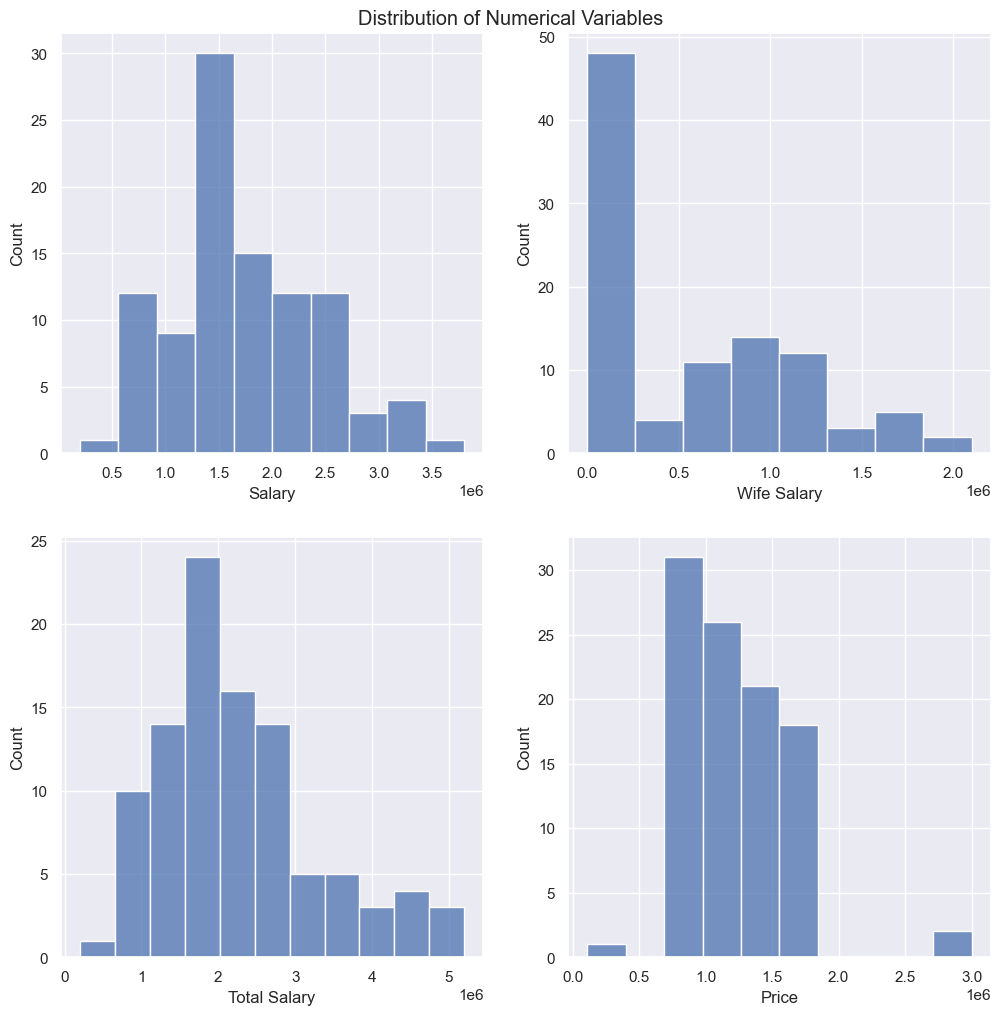

In [10]:
num_cols = ["Salary", "Wife Salary", "Total Salary", "Price"]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

for i, ax in enumerate(axs.flatten()):
    sns.histplot(data=behavior_df, x=num_cols[i], ax=ax)
plt.suptitle("Distribution of Numerical Variables", y=0.9);

* The Salary of the customers is grouped around 1000000 and 2500000.
* Wife's salary for most of the customers is zero. For those whose wife is working the salary is between 500000 and 1500000.
* The Total household salary of the customer is between 1000000 and 3000000.
* The Price of the cars purchased by the customers range between 500000 to 2000000.

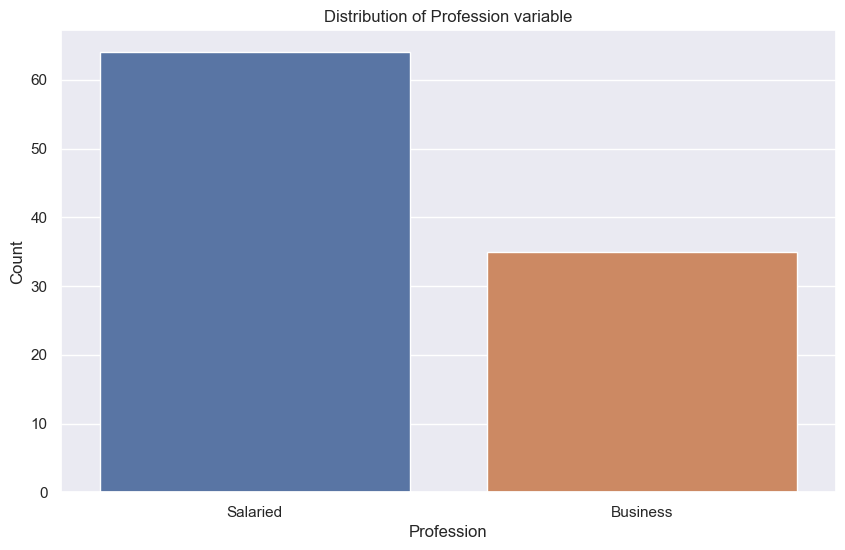

In [11]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Profession"].value_counts().index, y=behavior_df["Profession"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Profession variable")
plt.xlabel("Profession")
plt.ylabel("Count");

* Around 65% customers are Salaried while 35% have their own business.

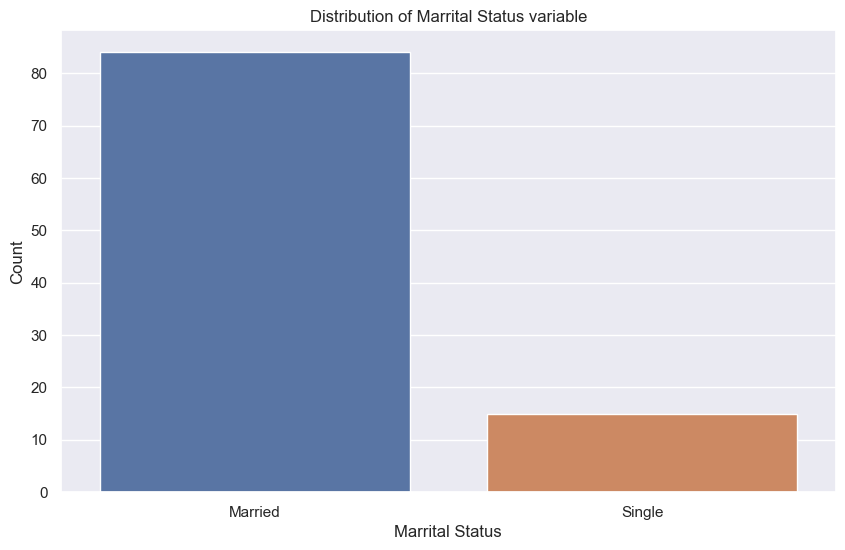

In [12]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Marrital Status"].value_counts().index, y=behavior_df["Marrital Status"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Marrital Status variable")
plt.xlabel("Marrital Status")
plt.ylabel("Count");

* Most of the customers in the dataset are Married.

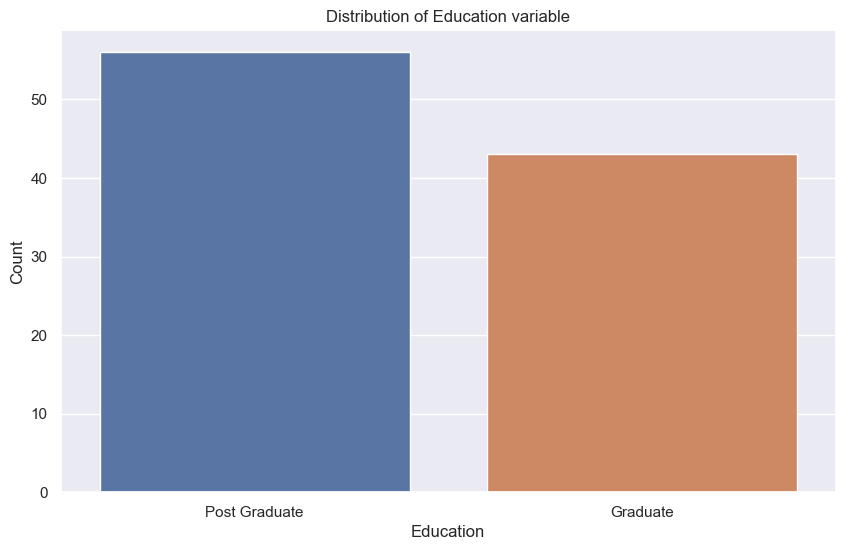

In [13]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Education"].value_counts().index, y=behavior_df["Education"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Education variable")
plt.xlabel("Education")
plt.ylabel("Count");

* Around 55% customers hold a Post Graduate degree while 35% have a Graduate degree.

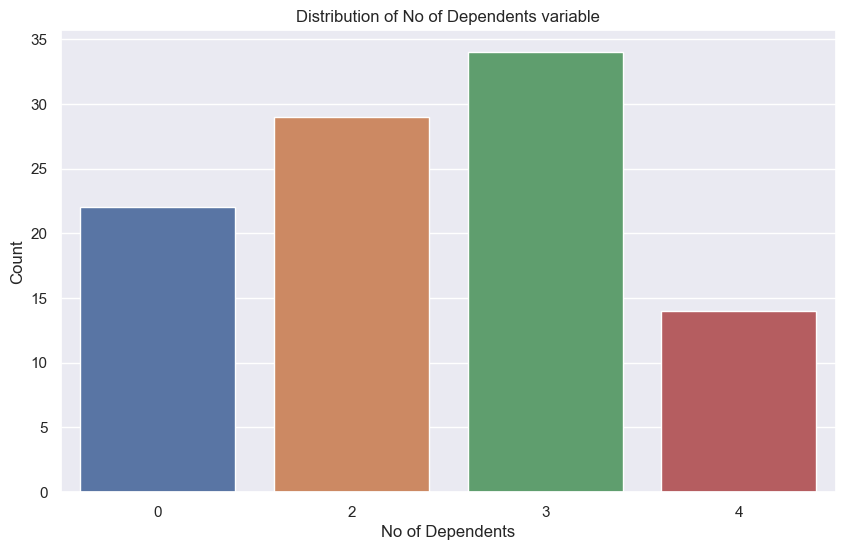

In [14]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["No of Dependents"].value_counts().index, y=behavior_df["No of Dependents"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of No of Dependents variable")
plt.xlabel("No of Dependents")
plt.ylabel("Count");

* Most of the customers have 3 and 2 dependents.

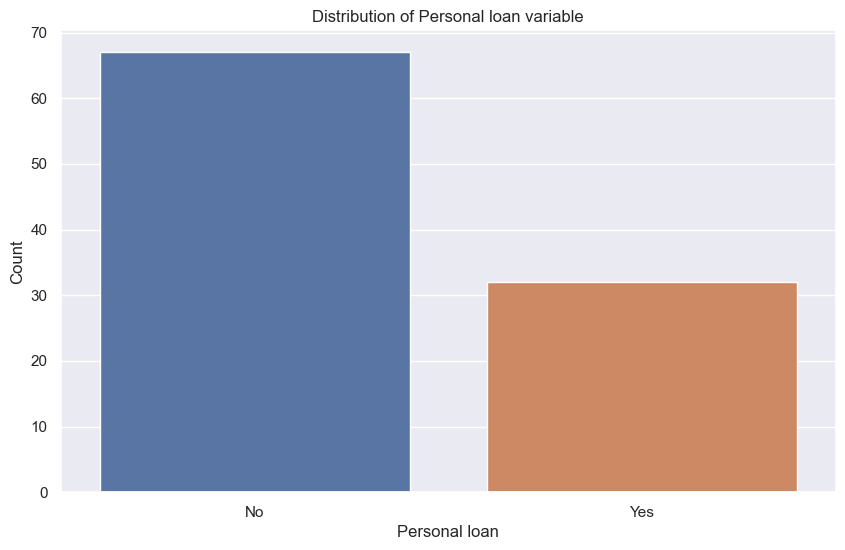

In [15]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Personal loan"].value_counts().index, y=behavior_df["Personal loan"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Personal loan variable")
plt.xlabel("Personal loan")
plt.ylabel("Count");

* Around 68% of the customers do not have a personal loan.

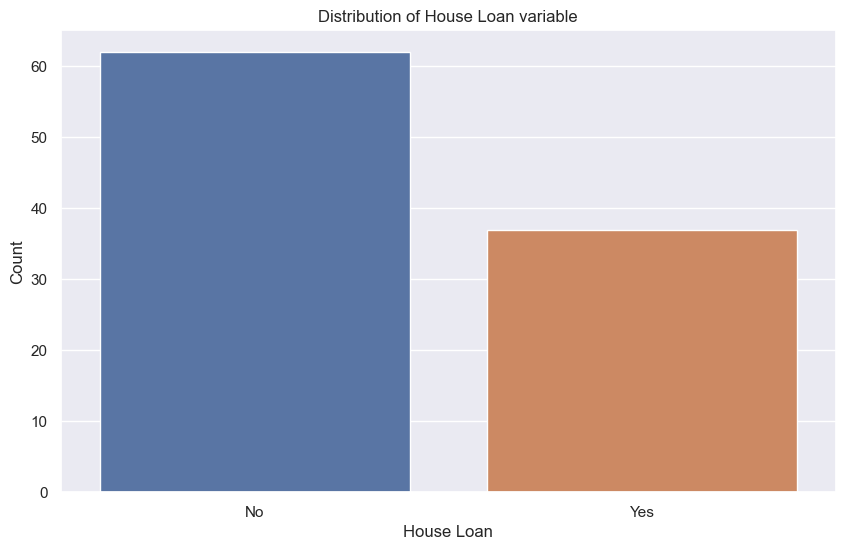

In [16]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["House Loan"].value_counts().index, y=behavior_df["House Loan"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of House Loan variable")
plt.xlabel("House Loan")
plt.ylabel("Count");

* Around 61% of the customers do not have a house loan.

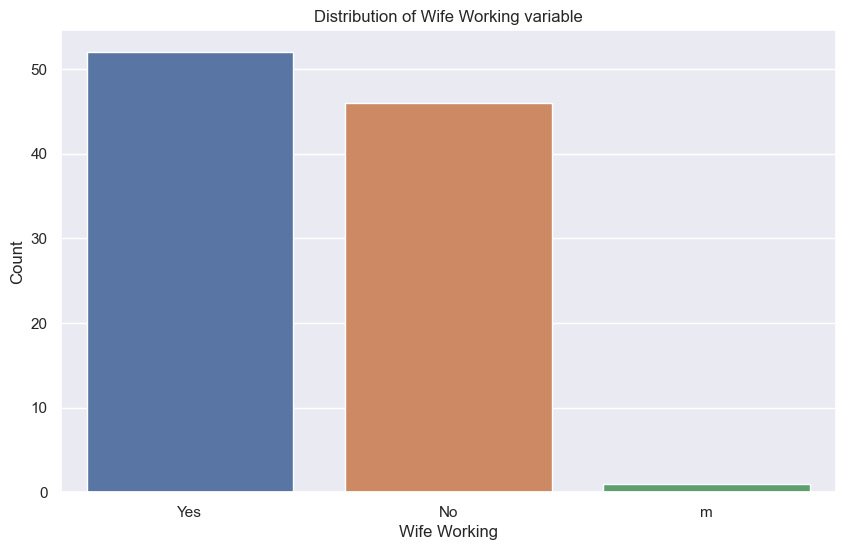

In [18]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Wife Working"].value_counts().index, y=behavior_df["Wife Working"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Wife Working variable")
plt.xlabel("Wife Working")
plt.ylabel("Count");

* Around 52% of the customer's wifes are working. There is a third category "m" which seems to be a mistake. We will merge this category with the "Yes" category.

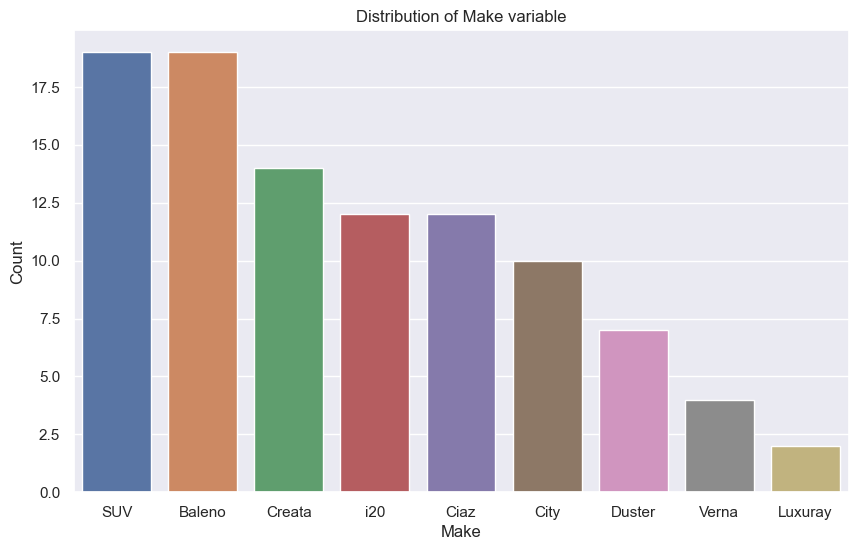

In [19]:
# Create a bar chart.
plt.figure(figsize=(10, 6))
sns.barplot(x=behavior_df["Make"].value_counts().index, y=behavior_df["Make"].value_counts())

# Add a title and labels to the axes.
plt.title("Distribution of Make variable")
plt.xlabel("Make")
plt.ylabel("Count");

* Most of the customers have purchased SUV and Baleno followed by Creata. Very few customers have bought Luxuray

# Data Preprocessing

In [21]:
# Drop duplicate values
print(f"Number of duplicate rows: {behavior_df.duplicated().sum()}")
behavior_df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [22]:
behavior_df["Wife Working"].value_counts()

Yes    52
No     46
m       1
Name: Wife Working, dtype: int64

In [23]:
behavior_df["Wife Working"] = behavior_df["Wife Working"].replace({"m": "Yes"})
behavior_df["Wife Working"].value_counts()

Yes    53
No     46
Name: Wife Working, dtype: int64

In [24]:
segmentation_df = behavior_df.copy()
segmentation_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [25]:
segmentation_df = pd.get_dummies(segmentation_df, drop_first=True)

In [26]:
scale_cols = ["Age", "Salary", "Wife Salary", "Total Salary", "Price"]

scaler = MinMaxScaler()
segmentation_df[scale_cols] = scaler.fit_transform(segmentation_df[scale_cols])

In [27]:
wss = []
ss = {1: 0}
for i in range(1, 11):
    KM = KMeans(n_clusters=i, random_state=0)
    KM.fit(segmentation_df)
    wss.append(KM.inertia_)
    if i > 1:
        y = KM.predict(segmentation_df)
        s = silhouette_score(segmentation_df, y, random_state=0)
        ss[i] = round(s, 5)
        print(f"The Average Silhouette Score for {i} clusters is {round(s, 5)}")

The Average Silhouette Score for 2 clusters is 0.37118
The Average Silhouette Score for 3 clusters is 0.19775
The Average Silhouette Score for 4 clusters is 0.19993
The Average Silhouette Score for 5 clusters is 0.1766
The Average Silhouette Score for 6 clusters is 0.18363
The Average Silhouette Score for 7 clusters is 0.17769
The Average Silhouette Score for 8 clusters is 0.13781
The Average Silhouette Score for 9 clusters is 0.14172
The Average Silhouette Score for 10 clusters is 0.14132


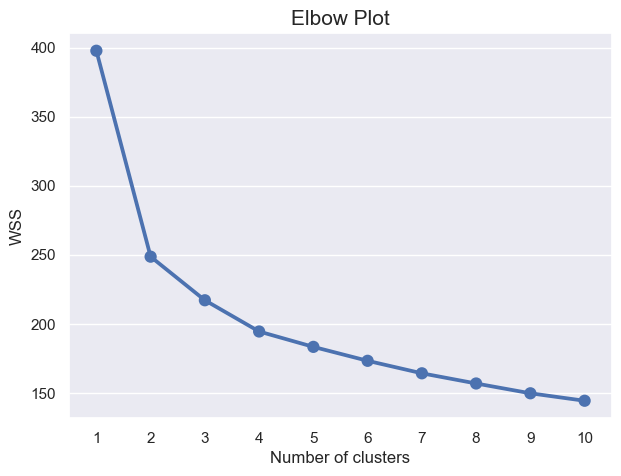

In [28]:
plt.figure(figsize=(7, 5))
sns.pointplot(x=list(range(1, 11)), y=wss)
plt.title("Elbow Plot", size=15)
plt.xlabel("Number of clusters")
plt.ylabel("WSS");

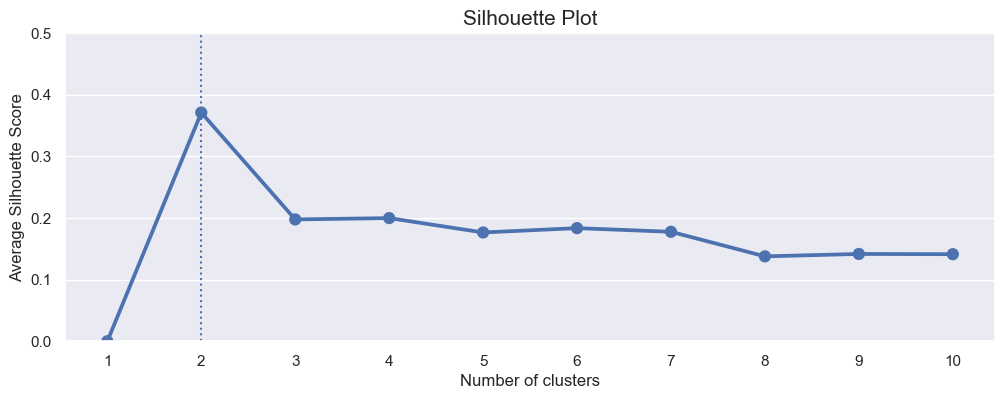

In [29]:
maxkey = [key for key, value in ss.items() if value == max(ss.values())][0]
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(x=list(ss.keys()), y=list(ss.values()))
plt.vlines(x=maxkey - 1, ymax=0, ymin=0.55, linestyles="dotted")
ax.set(ylim=(0, 0.5))
ax.set_title("Silhouette Plot", size=15)
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Average Silhouette Score");

In [30]:
KM_final = KMeans(n_clusters=2, random_state=0).fit(segmentation_df)
km_cluster_no = KM_final.labels_
behavior_df["KMeans Cluster"] = km_cluster_no

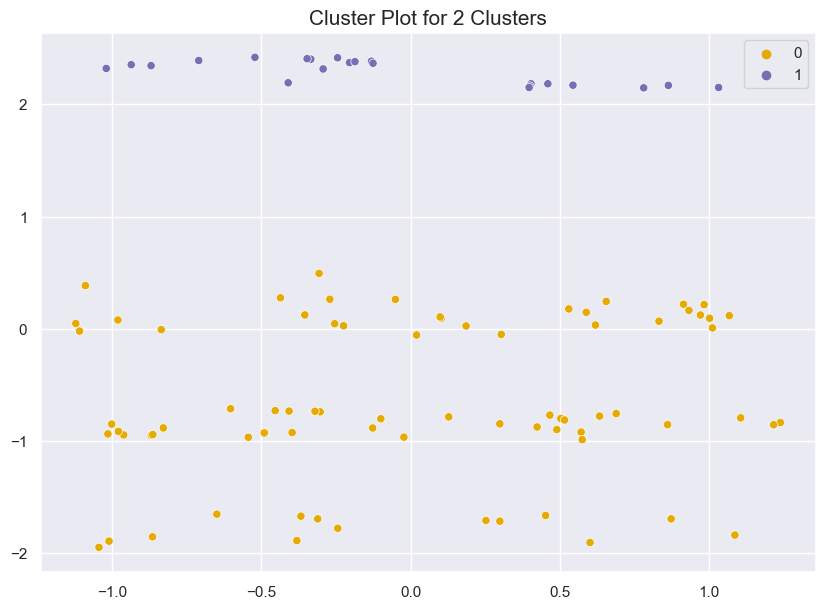

In [31]:
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(segmentation_df)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=plot_columns[:, 1],
    y=plot_columns[:, 0],
    hue=km_cluster_no,
    palette="Dark2_r",
    legend=True,
)
plt.title("Cluster Plot for 2 Clusters", size=15);

In [32]:
behavior_df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,KMeans Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000,0
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000,0
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000,0


In [33]:
behavior_df["KMeans Cluster"].value_counts()

0    77
1    22
Name: KMeans Cluster, dtype: int64

In [34]:
cluster_0_data = behavior_df[behavior_df["KMeans Cluster"] == 0]
cluster_1_data = behavior_df[behavior_df["KMeans Cluster"] == 1]

In [35]:
cluster_0_data.describe(include="all")

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price,KMeans Cluster
count,77.000000,77,77,77,77.000000,77,77,77,7.700000e+01,7.700000e+01,7.700000e+01,77,7.700000e+01,77.0
unique,NaN,2,2,2,NaN,2,2,2,NaN,NaN,NaN,9,NaN,NaN
top,NaN,Salaried,Married,Post Graduate,NaN,No,No,Yes,NaN,NaN,NaN,SUV,NaN,NaN
freq,NaN,50,75,44,NaN,49,40,44,NaN,NaN,NaN,14,NaN,NaN
mean,38.272727,NaN,NaN,NaN,2.805195,NaN,NaN,NaN,1.877922e+06,6.064935e+05,2.484416e+06,NaN,1.227273e+06,0.0
std,5.557443,NaN,NaN,NaN,0.726183,NaN,NaN,NaN,6.687820e+05,6.372923e+05,1.061908e+06,NaN,4.408832e+05,0.0
min,28.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,2.000000e+05,0.000000e+00,2.000000e+05,NaN,7.000000e+05,0.0
25%,35.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,1.400000e+06,0.000000e+00,1.800000e+06,NaN,8.000000e+05,0.0
50%,36.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,1.800000e+06,6.000000e+05,2.200000e+06,NaN,1.200000e+06,0.0
75%,42.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,2.300000e+06,1.100000e+06,3.000000e+06,NaN,1.500000e+06,0.0


For cluster 2:

  * The average age of the buyers in the cluster is around 40.
  * The most common profession of the buyers in the cluster is salaried, followed by business.
  * Most of the buyers in the cluster are married.
  * The most common level of education of the buyers in the cluster is Post Graduate.
  * The average number of dependents of the buyers in the cluster is 3.
  * The most common loan type of the buyers in the cluster is no loan.
  * The most common wife working status of the buyers in the cluster is yes.
  * The average salary of the buyers in the cluster is 1900000 Indian rupees.
  * The average wife salary of the buyers in the cluster is 600000 Indian rupees.
  * The average total salary of the buyers in the cluster is 2500000 Indian rupees.
  * The most popular make of car purchased by the buyers in the cluster is SUV.
  * The average price of the cars purchased by the buyers in the cluster is 1200000 Indian rupees.
 

These observations suggest that the second cluster is made up of middle-aged, well-educated, and well-paid professionals who are looking for expensive cars. The most popular cars in the cluster are SUVs, which are large and luxurious cars that are popular with families.

## Conslusion

As you can see, the two clusters are quite different in terms of their demographics and purchase behavior. Cluster 1 is made up of younger, less well-off professionals who are looking for affordable cars. Cluster 2 is made up of middle-aged, well-off professionals who are looking for expensive cars.

Here are some of the key differences between the two clusters:

  * Age: The average age of the buyers in Cluster 1 is 30, while the average age of the buyers in Cluster 2 is 40. This suggests that Cluster 1 is made up of younger professionals, while Cluster 2 is made up of more experienced professionals.
  * Income: The average total salary of the buyers in Cluster 1 is 1600000, while the average total salary of the buyers in Cluster 2 is 2500000. This suggests that Cluster 1 is made up of less well-off professionals, while Cluster 2 is made up of more well-off professionals.
  * Car preference: The most popular make of car in Cluster 1 is Baleno, Ciaz, and Creata, which are all relatively affordable cars. The most popular make of car in Cluster 2 is SUV, which are typically more expensive cars.

These differences suggest that the two clusters are looking for different things in a car. Cluster 1 is looking for an affordable car that is reliable and fuel-efficient. Cluster 2 is looking for a more luxurious and powerful car that can accommodate their families